In [1]:
# load useful packages
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
# add seaborn viz
sns.set()

In [2]:
#load df
attestations = pd.read_csv('atts_whole_final_forreal.csv', dtype={'validators2': str})
#drop row 1 - duplicate of row 0
#attestations = attestations.iloc[1:]
#drop first 2 columns
attestations = attestations.drop(['Unnamed: 0', 'id'], axis=1)
#drop last row - looks out of place
#attestations = attestations.drop(attestations.index[199999])
#check df
attestations.head()

/home/sid/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,validators1,validators2,attesting_validators,status
0,1,0.0,1.0,0.0,1.0,0.0,0.0,"{2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67.0,proposed
1,1,0.0,1.0,1.0,0.0,0.0,0.0,"{2070,10370,11439,19300,15116,11514,19895,3443...","[2070,10370,11439,19300,15116,11514,19895,3443...","[2070, 10370, 11439, 19300, 15116, 11514, 1989...",58.0,proposed
2,1,0.0,1.0,2.0,2.0,0.0,0.0,"{19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",62.0,proposed
3,1,0.0,1.0,3.0,3.0,0.0,0.0,"{9172,11101,14268,14207,15941,3072,9873,12303,...","[9172,11101,14268,14207,15941,3072,9873,12303,...","[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",62.0,proposed
4,1,0.0,1.0,4.0,2.0,0.0,0.0,{18136},[18136],[18136],1.0,proposed


In [3]:
attestations['slot'] = attestations['slot'].astype(int)
attestations['committeeindex'] = attestations['committeeindex'].astype(int)
attestations['block_index'] = attestations['block_index'].astype(int)
attestations['source_epoch'] = attestations['source_epoch'].astype(int)
attestations['target_epoch'] = attestations['target_epoch'].astype(int)
attestations['block_slot'] = attestations['block_slot'].astype(int)
attestations['attesting_validators'] = attestations['attesting_validators'].astype(int)

In [4]:
# single out slots
input_slot = attestations.filter(['input_slot'], axis=1)
input_slot = input_slot['input_slot'].to_list()

In [5]:
# program to Find missing integers in list 
def find_missing(lst): 
    start = lst[0] 
    end = lst[-1] 
    return sorted(set(range(start, end + 1)).difference(lst)) 
# driver code 
lst = input_slot 
# print(find_missing(lst))
missing_slots = pd.DataFrame(find_missing(lst), columns=['missing_slots'])
missing_slots

,missing_slots
0,381649


In [6]:
attestations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060853 entries, 0 to 21060852
Data columns (total 12 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   input_slot            int64 
 1   slot                  int64 
 2   block_slot            int64 
 3   block_index           int64 
 4   committeeindex        int64 
 5   source_epoch          int64 
 6   target_epoch          int64 
 7   validators            object
 8   validators1           object
 9   validators2           object
 10  attesting_validators  int64 
 11  status                object
dtypes: int64(8), object(4)
memory usage: 1.9+ GB


In [7]:
attestations['validators3'] = attestations['validators2'].replace(0,'[]') 

In [8]:
attestations.head()

,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,validators1,validators2,attesting_validators,status,validators3
0,1,0,1,0,1,0,0,"{2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,proposed,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10..."
1,1,0,1,1,0,0,0,"{2070,10370,11439,19300,15116,11514,19895,3443...","[2070,10370,11439,19300,15116,11514,19895,3443...","[2070, 10370, 11439, 19300, 15116, 11514, 1989...",58,proposed,"[2070, 10370, 11439, 19300, 15116, 11514, 1989..."
2,1,0,1,2,2,0,0,"{19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",62,proposed,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7..."
3,1,0,1,3,3,0,0,"{9172,11101,14268,14207,15941,3072,9873,12303,...","[9172,11101,14268,14207,15941,3072,9873,12303,...","[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",62,proposed,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,..."
4,1,0,1,4,2,0,0,{18136},[18136],[18136],1,proposed,[18136]


In [9]:
# attestations_no_gaps = attestations[attestations['validators1']!=0]

In [10]:
# attestations_no_gaps.head()

In [81]:
# attestations['validators4'] = attestations['validators3'].replace('0','[]') 

In [18]:
import ast

In [9]:
# Subset for no missing
# attestations_initial = attestations[(attestations['target_epoch']>=0) & (attestations['target_epoch']<3001)]
attestations_initial_no_missing = attestations[(attestations['status']!='missed') & (attestations['status']!='orphaned')]
attestations_initial_no_missing.head()

,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,validators1,validators2,attesting_validators,status,validators3
0,1,0,1,0,1,0,0,"{2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,proposed,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10..."
1,1,0,1,1,0,0,0,"{2070,10370,11439,19300,15116,11514,19895,3443...","[2070,10370,11439,19300,15116,11514,19895,3443...","[2070, 10370, 11439, 19300, 15116, 11514, 1989...",58,proposed,"[2070, 10370, 11439, 19300, 15116, 11514, 1989..."
2,1,0,1,2,2,0,0,"{19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",62,proposed,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7..."
3,1,0,1,3,3,0,0,"{9172,11101,14268,14207,15941,3072,9873,12303,...","[9172,11101,14268,14207,15941,3072,9873,12303,...","[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",62,proposed,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,..."
4,1,0,1,4,2,0,0,{18136},[18136],[18136],1,proposed,[18136]


In [10]:
# attestations_initial_no_missing[attestations_initial_no_missing['status']=='orphaned']

attestations_initial_no_missing['status'].unique()

array(['proposed'], dtype=object)

In [11]:
# attestations_initial['validators3'] = attestations_initial['validators3'].astype(str)
# print (type(attestations_initial['validators3'].iat[0]))

attestations_initial_no_missing['validators4'] = attestations_initial_no_missing['validators3'].replace('0','[]') 

<ipython-input-11-d1dc50a5249b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attestations_initial_no_missing['validators4'] = attestations_initial_no_missing['validators3'].replace('0','[]')


In [12]:
attestations_removed_all_missing = attestations_initial_no_missing[attestations_initial_no_missing['validators4'] != '[]'] 
attestations_removed_all_missing.head()

,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,validators1,validators2,attesting_validators,status,validators3,validators4
0,1,0,1,0,1,0,0,"{2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,proposed,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10..."
1,1,0,1,1,0,0,0,"{2070,10370,11439,19300,15116,11514,19895,3443...","[2070,10370,11439,19300,15116,11514,19895,3443...","[2070, 10370, 11439, 19300, 15116, 11514, 1989...",58,proposed,"[2070, 10370, 11439, 19300, 15116, 11514, 1989...","[2070, 10370, 11439, 19300, 15116, 11514, 1989..."
2,1,0,1,2,2,0,0,"{19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",62,proposed,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...","[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7..."
3,1,0,1,3,3,0,0,"{9172,11101,14268,14207,15941,3072,9873,12303,...","[9172,11101,14268,14207,15941,3072,9873,12303,...","[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",62,proposed,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,...","[9172, 11101, 14268, 14207, 15941, 3072, 9873,..."
4,1,0,1,4,2,0,0,{18136},[18136],[18136],1,proposed,[18136],[18136]


In [16]:
attestations_removed_all_missing['slot'].max()

466333

In [19]:
attestations_removed_all_missing['validators4'] = attestations_removed_all_missing.validators4.apply(lambda s: list(ast.literal_eval(s)))
attestations_removed_all_missing.head()


<ipython-input-19-52bc1970258c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attestations_removed_all_missing['validators4'] = attestations_removed_all_missing.validators4.apply(lambda s: list(ast.literal_eval(s)))


,input_slot,slot,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,validators1,validators2,attesting_validators,status,validators3,validators4
0,1,0,1,0,1,0,0,"{2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,proposed,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10..."
1,1,0,1,1,0,0,0,"{2070,10370,11439,19300,15116,11514,19895,3443...","[2070,10370,11439,19300,15116,11514,19895,3443...","[2070, 10370, 11439, 19300, 15116, 11514, 1989...",58,proposed,"[2070, 10370, 11439, 19300, 15116, 11514, 1989...","[2070, 10370, 11439, 19300, 15116, 11514, 1989..."
2,1,0,1,2,2,0,0,"{19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",62,proposed,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...","[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7..."
3,1,0,1,3,3,0,0,"{9172,11101,14268,14207,15941,3072,9873,12303,...","[9172,11101,14268,14207,15941,3072,9873,12303,...","[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",62,proposed,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,...","[9172, 11101, 14268, 14207, 15941, 3072, 9873,..."
4,1,0,1,4,2,0,0,{18136},[18136],[18136],1,proposed,[18136],[18136]


In [20]:
attestations_removed_all_missing['unique_commitee'] = attestations_removed_all_missing['slot'].apply(str)+'.'+attestations_removed_all_missing['committeeindex'].apply(str)



<ipython-input-20-91310b063ed8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attestations_removed_all_missing['unique_commitee'] = attestations_removed_all_missing['slot'].apply(str)+'.'+attestations_removed_all_missing['committeeindex'].apply(str)


In [21]:
df_view_a = attestations_removed_all_missing[['slot', 'committeeindex', 'unique_commitee', 'validators4']]
df_view_a.head()

,slot,committeeindex,unique_commitee,validators4
0,0,1,0.1,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10..."
1,0,0,0.0,"[2070, 10370, 11439, 19300, 15116, 11514, 1989..."
2,0,2,0.2,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7..."
3,0,3,0.3,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,..."
4,0,2,0.2,[18136]


In [22]:
expanded_validators_per_commitee = df_view_a.explode('validators4')
expanded_validators_per_commitee.head()

,slot,committeeindex,unique_commitee,validators4
0,0,1,0.1,2763
0,0,1,0.1,2256
0,0,1,0.1,11588
0,0,1,0.1,3679
0,0,1,0.1,7119


In [23]:
#id for duplicate rows
expanded_validators_per_commitee['duplicate'] = expanded_validators_per_commitee.duplicated(keep=False)
expanded_validators_per_commitee.head()
# filter for condition
expanded_validators_per_commitee.loc[expanded_validators_per_commitee['duplicate'] == True]

,slot,committeeindex,unique_commitee,validators4,duplicate
0,0,1,0.1,2763,True
0,0,1,0.1,2256,True
0,0,1,0.1,11588,True
0,0,1,0.1,3679,True
0,0,1,0.1,7119,True
...,...,...,...,...,...
20928725,466314,4,466314.4,2365,True
20928725,466314,4,466314.4,67943,True
20928725,466314,4,466314.4,35713,True
20928725,466314,4,466314.4,44339,True


In [24]:
#grouping by unique comittee - True if duplucates exist
unique_committee_dupes = expanded_validators_per_commitee[expanded_validators_per_commitee['duplicate']==True].unique_commitee.unique()
df_view_a['validator_duped_within_unique_committee'] = df_view_a.unique_commitee.isin(unique_committee_dupes)
### View A (pt1) - Duplicate validators within unique committees.tail()
df_view_a.head()

<ipython-input-24-b25112d20a95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_view_a['validator_duped_within_unique_committee'] = df_view_a.unique_commitee.isin(unique_committee_dupes)


,slot,committeeindex,unique_commitee,validators4,validator_duped_within_unique_committee
0,0,1,0.1,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",True
1,0,0,0.0,"[2070, 10370, 11439, 19300, 15116, 11514, 1989...",True
2,0,2,0.2,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",True
3,0,3,0.3,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",True
4,0,2,0.2,[18136],True


In [25]:
colorscheme = ['lightcoral', 'cornflowerblue','bisque', 'plum', 'palegreen','darkgray']

Text(0, 0.5, 'Number of duplicate attestations')

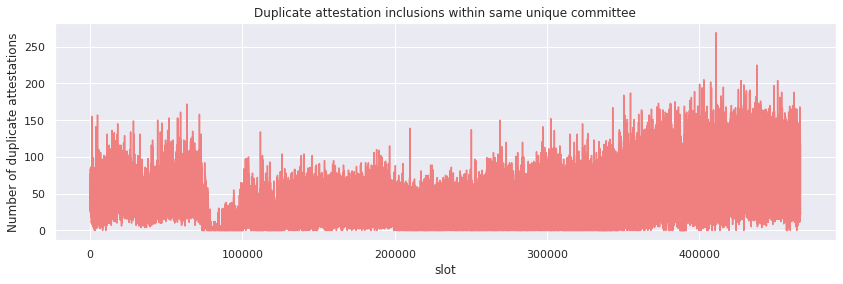

In [28]:
df_view_a_filtered = df_view_a[df_view_a['slot']>0]


ax = df_view_a_filtered.groupby('slot')['validator_duped_within_unique_committee'].sum().plot(figsize=[14,4], title='Duplicate attestation inclusions within same unique committee', color=colorscheme)
# df_view_a.sort_values(by=['slot'])
ax.set_ylabel('Number of duplicate attestations')

In [29]:
#df_view adding block_index and input_slot
df_view_a2 = attestations_removed_all_missing[['slot', 'block_index','input_slot','committeeindex', 'unique_commitee', 'validators4']]
df_view_a2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20928726 entries, 0 to 20928725
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   slot             int64 
 1   block_index      int64 
 2   input_slot       int64 
 3   committeeindex   int64 
 4   unique_commitee  object
 5   validators4      object
dtypes: int64(4), object(2)
memory usage: 1.1+ GB


In [30]:
#explode into unique rows
expanded_validators_per_commitee = df_view_a2.explode('validators4')
expanded_validators_per_commitee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976595905 entries, 0 to 20928725
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   slot             int64 
 1   block_index      int64 
 2   input_slot       int64 
 3   committeeindex   int64 
 4   unique_commitee  object
 5   validators4      object
dtypes: int64(4), object(2)
memory usage: 50.9+ GB


In [31]:
#id for duplicate rows
expanded_validators_per_commitee['duplicate'] = expanded_validators_per_commitee.duplicated(keep=False)
expanded_validators_per_commitee.head()
# filter for condition
expanded_validators_per_commitee.loc[expanded_validators_per_commitee['duplicate'] == True]

,slot,block_index,input_slot,committeeindex,unique_commitee,validators4,duplicate
16620876,410907,85,410909,6,410907.6,27674,True
16620876,410907,85,410909,6,410907.6,17630,True
16620876,410907,85,410909,6,410907.6,47477,True
16620876,410907,85,410909,6,410907.6,48223,True
16620876,410907,85,410909,6,410907.6,27736,True
...,...,...,...,...,...,...,...
16624731,410928,39,410929,8,410928.8,41838,True
16624731,410928,39,410929,8,410928.8,45280,True
16624731,410928,39,410929,8,410928.8,45058,True
16624731,410928,39,410929,8,410928.8,66606,True


In [32]:
doublevotes_within_slots = expanded_validators_per_commitee.loc[expanded_validators_per_commitee['duplicate'] == True]
doublevotes_within_slots

,slot,block_index,input_slot,committeeindex,unique_commitee,validators4,duplicate
16620876,410907,85,410909,6,410907.6,27674,True
16620876,410907,85,410909,6,410907.6,17630,True
16620876,410907,85,410909,6,410907.6,47477,True
16620876,410907,85,410909,6,410907.6,48223,True
16620876,410907,85,410909,6,410907.6,27736,True
...,...,...,...,...,...,...,...
16624731,410928,39,410929,8,410928.8,41838,True
16624731,410928,39,410929,8,410928.8,45280,True
16624731,410928,39,410929,8,410928.8,45058,True
16624731,410928,39,410929,8,410928.8,66606,True


In [33]:
doublevotes_within_slots.to_csv('double_votes_within_slots.csv')

## Duplicate validators across committees in the same SLOT

In [34]:
expanded_validators_per_slot = df_view_a.explode('validators4')[['slot', 'committeeindex', 'validators4']]
expanded_validators_per_slot.head()

,slot,committeeindex,validators4
0,0,1,2763
0,0,1,2256
0,0,1,11588
0,0,1,3679
0,0,1,7119


In [35]:
unique_committees_per_slot = expanded_validators_per_slot.groupby(['slot', 'validators4']).nunique()
unique_committees_per_slot.head()

slot  committeeindex  validators4
slot validators4                                   
0    2070            1               1            1
     2113            1               1            1
     2117            1               1            1
     2223            1               1            1
     2256            1               1            1

In [36]:
unique_committees_per_slot[unique_committees_per_slot['committeeindex']>1]

slot  committeeindex  validators4
slot   validators4                                   
73738  0               1               2            1
73752  0               1               2            1
73965  0               1               2            1
73977  0               1               2            1
74026  0               1               2            1
...                  ...             ...          ...
391086 67934           1               2            1
       68027           1               2            1
       68095           1               2            1
       68223           1               2            1
       68266           1               2            1

[1656206 rows x 3 columns]

In [37]:
same_slot_twice_included = unique_committees_per_slot[unique_committees_per_slot['committeeindex']>1]


In [39]:
same_slot_twice_included.to_csv('same_slot_twice_attested.csv')

## View B

In [40]:
df_view_b = attestations_removed_all_missing[['target_epoch', 'unique_commitee', 'validators4']]
df_view_b.head()

,target_epoch,unique_commitee,validators4
0,0,0.1,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10..."
1,0,0.0,"[2070, 10370, 11439, 19300, 15116, 11514, 1989..."
2,0,0.2,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7..."
3,0,0.3,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,..."
4,0,0.2,[18136]


In [41]:
expanded_validators_per_epoch = df_view_b.explode('validators4')
expanded_validators_per_epoch.head()

,target_epoch,unique_commitee,validators4
0,0,0.1,2763
0,0,0.1,2256
0,0,0.1,11588
0,0,0.1,3679
0,0,0.1,7119


In [42]:
unique_committees_per_epoch = expanded_validators_per_epoch.groupby(['target_epoch', 'validators4']).nunique()
unique_committees_per_epoch.head()

target_epoch  unique_commitee  validators4
target_epoch validators4                                            
0            3                       1                1            1
             1029                    1                1            1
             1031                    1                1            1
             1032                    1                1            1
             1033                    1                1            1

In [43]:
double_vote_epoch = unique_committees_per_epoch[unique_committees_per_epoch['unique_commitee']>1]
double_vote_epoch


target_epoch  unique_commitee  validators4
target_epoch validators4                                            
2299         0                       1                2            1
             14                      1                2            1
             23                      1                2            1
             27                      1                2            1
             35                      1                2            1
...                                ...              ...          ...
12221        68485                   1                2            1
             68493                   1                3            1
             68500                   1                2            1
             68511                   1                2            1
             68520                   1                2            1

[7258621 rows x 3 columns]

In [50]:
double_vote_epoch.to_csv('double_vote_epoch.csv')

## Valuable attestations and inclusion lag

In [44]:
epoch_slot = pd.read_csv('./atts-data/atts-data-2.0/epoch_slot.csv')
attestations_removed_all_missing['inclusion_lag'] = attestations_removed_all_missing['input_slot'] - attestations_removed_all_missing['slot']
attestations_removed_all_missing['epoch_diff_targetvslot'] = attestations_removed_all_missing['target_epoch']-attestations_removed_all_missing['source_epoch']


attestations_b = pd.merge(left=attestations_removed_all_missing, right=epoch_slot, how='left', left_on='input_slot', right_on='slot')

<ipython-input-44-36aec6a9bf1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attestations_removed_all_missing['inclusion_lag'] = attestations_removed_all_missing['input_slot'] - attestations_removed_all_missing['slot']
<ipython-input-44-36aec6a9bf1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attestations_removed_all_missing['epoch_diff_targetvslot'] = attestations_removed_all_missing['target_epoch']-attestations_removed_all_missing['source_epoch']


In [45]:
attestations_b.head()

,input_slot,slot_x,block_slot,block_index,committeeindex,source_epoch,target_epoch,validators,validators1,validators2,attesting_validators,status,validators3,validators4,unique_commitee,inclusion_lag,epoch_diff_targetvslot,Unnamed: 0,slot_y,epoch
0,1,0,1,0,1,0,0,"{2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763,2256,11588,3679,7119,9906,6905,10792,457...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,proposed,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...","[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",0.1,1,0,275568.0,1.0,0.0
1,1,0,1,1,0,0,0,"{2070,10370,11439,19300,15116,11514,19895,3443...","[2070,10370,11439,19300,15116,11514,19895,3443...","[2070, 10370, 11439, 19300, 15116, 11514, 1989...",58,proposed,"[2070, 10370, 11439, 19300, 15116, 11514, 1989...","[2070, 10370, 11439, 19300, 15116, 11514, 1989...",0.0,1,0,275568.0,1.0,0.0
2,1,0,1,2,2,0,0,"{19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012,2994,3875,9963,8696,7033,11148,7006,139...","[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",62,proposed,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...","[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",0.2,1,0,275568.0,1.0,0.0
3,1,0,1,3,3,0,0,"{9172,11101,14268,14207,15941,3072,9873,12303,...","[9172,11101,14268,14207,15941,3072,9873,12303,...","[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",62,proposed,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,...","[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",0.3,1,0,275568.0,1.0,0.0
4,1,0,1,4,2,0,0,{18136},[18136],[18136],1,proposed,[18136],[18136],0.2,1,0,275568.0,1.0,0.0


In [46]:
#narrowing down the view to the variables necessary in order to 

valuable_attestations_view = attestations_b[['input_slot', 'epoch', 'slot_x', 'block_slot', 'block_index','unique_commitee','target_epoch', 'validators4', 'attesting_validators', 'inclusion_lag', 'epoch_diff_targetvslot']]
valuable_attestations_view = valuable_attestations_view.rename(columns={'slot_x':'target_slot'})
valuable_attestations_view.sort_values(by=['inclusion_lag'])

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators4,attesting_validators,inclusion_lag,epoch_diff_targetvslot
0,1,0.0,0,1,0,0.1,0,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,1,0
11012948,316620,9894.0,316619,316620,8,316619.5,9894,"[8026, 37, 7157, 36685, 43375, 6211, 340, 4939...",106,1,1
11012949,316620,9894.0,316619,316620,7,316619.5,9894,"[8026, 37, 7157, 36685, 43375, 6211, 340, 4939...",107,1,1
11012961,316620,9894.0,316619,316620,56,316619.9,9894,[55151],1,1,1
11012963,316620,9894.0,316619,316620,54,316619.4,9894,"[36461, 43415, 33481, 51772, 16148, 57844, 267...",90,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2266352,49105,1534.0,49073,49105,23,49073.1,1533,"[24912, 164, 185]",3,32,1
3001747,62822,1963.0,62790,62822,21,62790.2,1962,"[25052, 24891, 8091, 24505]",4,32,1
5378638,149794,4681.0,149762,149794,65,149762.2,4680,[31357],1,32,1
7777441,220968,6905.0,220936,220968,1,220936.5,6904,[37202],1,32,1


## 1) Separating valuable from non-valuable attestations

In [47]:
#adding a combined block slot and index column so we can take the minimum of it per validator
valuable_attestations_view['block_slot_&_index'] = pd.to_numeric((valuable_attestations_view['block_slot'].astype(str) + '.' + valuable_attestations_view['block_index'].astype(str)), downcast="float")
valuable_attestations_view.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators4,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index
0,1,0.0,0,1,0,0.1,0,"[2763, 2256, 11588, 3679, 7119, 9906, 6905, 10...",67,1,0,1.0
1,1,0.0,0,1,1,0.0,0,"[2070, 10370, 11439, 19300, 15116, 11514, 1989...",58,1,0,1.1
2,1,0.0,0,1,2,0.2,0,"[19012, 2994, 3875, 9963, 8696, 7033, 11148, 7...",62,1,0,1.2
3,1,0.0,0,1,3,0.3,0,"[9172, 11101, 14268, 14207, 15941, 3072, 9873,...",62,1,0,1.3
4,1,0.0,0,1,4,0.2,0,[18136],1,1,0,1.4


In [48]:
#explode
expanded_valuable_attestations_view = valuable_attestations_view.explode('validators4')
expanded_valuable_attestations_view.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators4,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index
0,1,0.0,0,1,0,0.1,0,2763,67,1,0,1.0
0,1,0.0,0,1,0,0.1,0,2256,67,1,0,1.0
0,1,0.0,0,1,0,0.1,0,11588,67,1,0,1.0
0,1,0.0,0,1,0,0.1,0,3679,67,1,0,1.0
0,1,0.0,0,1,0,0.1,0,7119,67,1,0,1.0


In [49]:
#add column where you define valuable attestations
expanded_valuable_attestations_view['valuable_attestation'] = expanded_valuable_attestations_view.groupby(['epoch', 'validators4'])['block_slot_&_index'].transform('min')
expanded_valuable_attestations_view.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators4,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index,valuable_attestation
0,1,0.0,0,1,0,0.1,0,2763,67,1,0,1.0,1.0
0,1,0.0,0,1,0,0.1,0,2256,67,1,0,1.0,1.0
0,1,0.0,0,1,0,0.1,0,11588,67,1,0,1.0,1.0
0,1,0.0,0,1,0,0.1,0,3679,67,1,0,1.0,1.0
0,1,0.0,0,1,0,0.1,0,7119,67,1,0,1.0,1.0


In [51]:
# Per epoch, unique_committtee, validator index -- this is the df with the valuable attestion for that validator
only_valuable_attestation_rows = expanded_valuable_attestations_view[expanded_valuable_attestations_view['block_slot_&_index']==expanded_valuable_attestations_view['valuable_attestation']].sort_values(by=['inclusion_lag'])
only_valuable_attestation_rows.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators4,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index,valuable_attestation
0,1,0.0,0,1,0,0.1,0,2763,67,1,0,1.00000,1.00000
11783553,336098,10503.0,336097,336098,34,336097.0,10503,56726,93,1,1,336098.34375,336098.34375
11783553,336098,10503.0,336097,336098,34,336097.0,10503,50637,93,1,1,336098.34375,336098.34375
11783553,336098,10503.0,336097,336098,34,336097.0,10503,38215,93,1,1,336098.34375,336098.34375
11783553,336098,10503.0,336097,336098,34,336097.0,10503,38279,93,1,1,336098.34375,336098.34375


## 2) Filtering for ratio of valuable to non-valuable attestations uptime and inclusion lag

In [52]:
# Per validator number of valuable attestations overall
summary_valuable_attestations = only_valuable_attestation_rows.groupby('validators4')['valuable_attestation'].count().sort_values(ascending=False)
summary_valuable_attestations.head()

validators4
2418    13953
2903    13951
1801    13946
2996    13939
2196    13936
Name: valuable_attestation, dtype: int64

In [53]:
only_nonvaluable_attestation_rows = expanded_valuable_attestations_view[expanded_valuable_attestations_view['block_slot_&_index']!=expanded_valuable_attestations_view['valuable_attestation']].sort_values(by=['inclusion_lag'])
only_nonvaluable_attestation_rows.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators4,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index,valuable_attestation
14,3,0.0,2,3,20,2.3,0,11590,18,1,0,3.20000,3.19000
18500205,434269,13570.0,434268,434269,29,434268.3,13570,48466,79,1,2,434269.28125,434269.21875
18500205,434269,13570.0,434268,434269,29,434268.3,13570,9534,79,1,2,434269.28125,434269.21875
18500205,434269,13570.0,434268,434269,29,434268.3,13570,34845,79,1,2,434269.28125,434269.21875
18500205,434269,13570.0,434268,434269,29,434268.3,13570,17540,79,1,2,434269.28125,434269.21875


In [54]:
summary_nonvaluable_attestations = only_nonvaluable_attestation_rows.groupby('validators4')['block_slot_&_index'].count().sort_values(ascending=False)
summary_nonvaluable_attestations.head()

validators4
9641    15827
9709    15768
9705    15761
9631    15751
9710    15749
Name: block_slot_&_index, dtype: int64

In [55]:
# Per validator average inclusion lag of valuable attestations
inclusion_lag_valuable_attestations = only_valuable_attestation_rows.groupby('validators4')['inclusion_lag'].mean().sort_values(ascending=False)
inclusion_lag_valuable_attestations.head()

validators4
30926    24.000000
54397    22.000000
49410    20.000000
76962    17.333333
53550    17.000000
Name: inclusion_lag, dtype: float64

In [56]:
# Per validator Ratio = number of valuable/nonvaluable attestations overall
df_validator_valuable_ratio = pd.concat([summary_valuable_attestations, summary_nonvaluable_attestations, inclusion_lag_valuable_attestations], axis=1)
df_validator_valuable_ratio['ratio_valuable_to_nonvaluable'] = pd.to_numeric(df_validator_valuable_ratio['valuable_attestation'])/pd.to_numeric(df_validator_valuable_ratio['block_slot_&_index'])
df_validator_valuable_ratio.head()

,valuable_attestation,block_slot_&_index,inclusion_lag,ratio_valuable_to_nonvaluable
validators4,,,,
0,13368.0,15398.0,6.327124,0.868165
1,22.0,4.0,6.863636,5.500000
2,16.0,6.0,8.250000,2.666667
3,9681.0,12562.0,6.830803,0.770658
4,4098.0,5870.0,8.840166,0.698126


In [58]:
df_validator_valuable_ratio.describe()

,valuable_attestation,block_slot_&_index,inclusion_lag,ratio_valuable_to_nonvaluable
count,76376.000000,75723.000000,76376.000000,75722.000000
mean,6263.583403,6583.254242,5.411617,1.041837
std,4414.318061,4400.772017,1.775466,0.854632
min,1.000000,1.000000,1.000000,0.125000
25%,2245.000000,2933.000000,4.182052,0.836627
50%,6172.000000,6231.000000,5.189159,0.957237
75%,10257.000000,9700.000000,6.220085,1.052566
max,13953.000000,15827.000000,24.000000,28.000000


In [59]:
df_validator_valuable_ratio[df_validator_valuable_ratio['ratio_valuable_to_nonvaluable']==22.000000]

,valuable_attestation,block_slot_&_index,inclusion_lag,ratio_valuable_to_nonvaluable
validators4,,,,
5996,22.0,1.0,8.954545,22.0
9572,22.0,1.0,3.590909,22.0
9593,22.0,1.0,8.636364,22.0
22939,22.0,1.0,7.545455,22.0
25576,22.0,1.0,4.909091,22.0
26169,22.0,1.0,6.772727,22.0
28375,22.0,1.0,9.000000,22.0


In [60]:
#add metrics on time active
proposer_effectiveness = pd.read_csv('./atts-data/atts-data-2.0/proposer_effectiveness.csv')
proposer_effectiveness.head()

,Unnamed: 0,validator_index,activationepoch,slashed,epochs_active,missed,participated,proposer_effectiveness,proposer_effectiveness_time_weighted,epoch,probability_of_proposing_at_least_once_hereon,proposer_effectiveness_time_n_diff_weighted
0,76768,76773,14523,0.0,49,0.0,1.0,1.0,0.020408,14523.0,0.001688,12.087853
1,76663,76668,14497,0.0,75,0.0,1.0,1.0,0.013333,14497.0,0.012602,1.058056
2,76641,76646,14491,0.0,81,0.0,1.0,1.0,0.012346,14491.0,0.015105,0.817306
3,76620,76625,14486,0.0,86,0.0,1.0,1.0,0.011628,14486.0,0.017187,0.676536
4,76598,76603,14481,0.0,91,0.0,1.0,1.0,0.010989,14481.0,0.019266,0.570393


In [61]:
df_validator_ratio = df_validator_valuable_ratio.merge(proposer_effectiveness, left_on='validators4', right_on='validator_index')[['valuable_attestation', 'block_slot_&_index', 'ratio_valuable_to_nonvaluable', 'epochs_active', 'inclusion_lag', 'missed', 'participated', 'proposer_effectiveness_time_n_diff_weighted']]
df_validator_ratio

,valuable_attestation,block_slot_&_index,ratio_valuable_to_nonvaluable,epochs_active,inclusion_lag,missed,participated,proposer_effectiveness_time_n_diff_weighted
0,13368.0,15398.0,0.868165,14572,6.327124,7.0,17.0,0.000040
1,22.0,4.0,5.500000,14572,6.863636,5.0,5.0,0.000000
2,16.0,6.0,2.666667,14572,8.250000,8.0,8.0,0.000000
3,9681.0,12562.0,0.770658,14572,6.830803,4.0,16.0,0.000051
4,4098.0,5870.0,0.698126,14572,8.840166,0.0,6.0,0.000069
...,...,...,...,...,...,...,...,...
76223,53.0,58.0,0.913793,46,3.566038,0.0,0.0,0.000000
76224,46.0,84.0,0.547619,46,5.043478,0.0,0.0,0.000000
76225,48.0,89.0,0.539326,46,3.812500,0.0,0.0,0.000000
76226,48.0,77.0,0.623377,45,3.750000,0.0,0.0,NaN


In [62]:
#calculate an uptime ratio
df_validator_ratio['uptime_ratio'] = df_validator_ratio['valuable_attestation']/df_validator_ratio['epochs_active']
df_validator_ratio.head()

,valuable_attestation,block_slot_&_index,ratio_valuable_to_nonvaluable,epochs_active,inclusion_lag,missed,participated,proposer_effectiveness_time_n_diff_weighted,uptime_ratio
0,13368.0,15398.0,0.868165,14572,6.327124,7.0,17.0,0.000040,0.917376
1,22.0,4.0,5.500000,14572,6.863636,5.0,5.0,0.000000,0.001510
2,16.0,6.0,2.666667,14572,8.250000,8.0,8.0,0.000000,0.001098
3,9681.0,12562.0,0.770658,14572,6.830803,4.0,16.0,0.000051,0.664356
4,4098.0,5870.0,0.698126,14572,8.840166,0.0,6.0,0.000069,0.281224


In [63]:
#clear up column names
df_validator_ratio.rename(columns={'inclusion_lag':'avg_inclusion_lag'})
df_validator_ratio.rename(columns={'valuable_attestation':'num_valuable_attestations'})
df_validator_ratio.rename(columns={'block_slot_&_index':'num_nonvaluable_attestations'})

,valuable_attestation,num_nonvaluable_attestations,ratio_valuable_to_nonvaluable,epochs_active,inclusion_lag,missed,participated,proposer_effectiveness_time_n_diff_weighted,uptime_ratio
0,13368.0,15398.0,0.868165,14572,6.327124,7.0,17.0,0.000040,0.917376
1,22.0,4.0,5.500000,14572,6.863636,5.0,5.0,0.000000,0.001510
2,16.0,6.0,2.666667,14572,8.250000,8.0,8.0,0.000000,0.001098
3,9681.0,12562.0,0.770658,14572,6.830803,4.0,16.0,0.000051,0.664356
4,4098.0,5870.0,0.698126,14572,8.840166,0.0,6.0,0.000069,0.281224
...,...,...,...,...,...,...,...,...,...
76223,53.0,58.0,0.913793,46,3.566038,0.0,0.0,0.000000,1.152174
76224,46.0,84.0,0.547619,46,5.043478,0.0,0.0,0.000000,1.000000
76225,48.0,89.0,0.539326,46,3.812500,0.0,0.0,0.000000,1.043478
76226,48.0,77.0,0.623377,45,3.750000,0.0,0.0,NaN,1.066667


In [64]:
df_validator_ratio.describe()

,valuable_attestation,block_slot_&_index,ratio_valuable_to_nonvaluable,epochs_active,inclusion_lag,missed,participated,proposer_effectiveness_time_n_diff_weighted,uptime_ratio
count,76227.000000,75576.000000,75575.000000,76228.000000,76227.000000,76228.000000,76228.000000,76226.000000,76227.000000
mean,6275.773387,6595.976474,1.042483,9245.003804,5.415153,1.660086,6.048014,0.000496,0.750356
std,4410.002693,4395.575870,0.855196,4772.729593,1.773076,2.882641,4.692525,0.044507,0.345896
min,1.000000,1.000000,0.125000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000069
25%,2247.000000,2971.000000,0.839038,5039.000000,4.186125,0.000000,2.000000,0.000034,0.561072
50%,6258.000000,6251.000000,0.957564,9833.000000,5.193022,0.000000,5.000000,0.000069,0.914562
75%,10265.500000,9704.000000,1.053026,14572.000000,6.220987,2.000000,9.000000,0.000125,1.008362
max,13953.000000,15827.000000,28.000000,14572.000000,24.000000,30.000000,30.000000,12.087853,1.217391


In [65]:
df_validator_ratio.info() n, m 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76228 entries, 0 to 76227
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   valuable_attestation                         76227 non-null  float64
 1   block_slot_&_index                           75576 non-null  float64
 2   ratio_valuable_to_nonvaluable                75575 non-null  float64
 3   epochs_active                                76228 non-null  int64  
 4   inclusion_lag                                76227 non-null  float64
 5   missed                                       76228 non-null  float64
 6   participated                                 76228 non-null  float64
 7   proposer_effectiveness_time_n_diff_weighted  76226 non-null  float64
 8   uptime_ratio                                 76227 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 5.8 MB


In [66]:
df_validator_ratio.to_csv('validator_ratios.csv')

## 3) Looking for finality


In [67]:
#calculate new column with the difference between target epoch and epoch included on chain
only_valuable_attestation_rows['target_current_epoch_diff'] = -1*(only_valuable_attestation_rows['target_epoch'] - only_valuable_attestation_rows['epoch'])
only_valuable_attestation_rows[only_valuable_attestation_rows['target_current_epoch_diff']==1.0].count()

input_slot                   126079303
epoch                        126079303
target_slot                  126079303
block_slot                   126079303
block_index                  126079303
unique_commitee              126079303
target_epoch                 126079303
validators4                  126079303
attesting_validators         126079303
inclusion_lag                126079303
epoch_diff_targetvslot       126079303
block_slot_&_index           126079303
valuable_attestation         126079303
target_current_epoch_diff    126079303
dtype: int64

Text(0, 0.5, 'Avg difference between target & current epoch')

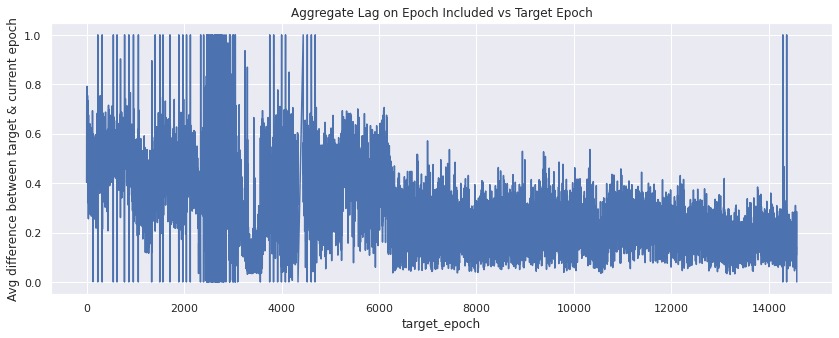

In [71]:
#plot the aggregate lag on epoch included vs target epoch
ax = only_valuable_attestation_rows.groupby('target_epoch')['target_current_epoch_diff'].mean().plot(kind = 'line', title='Aggregate Lag on Epoch Included vs Target Epoch', figsize=(14,5))

ax.set_ylabel('Avg difference between target & current epoch')


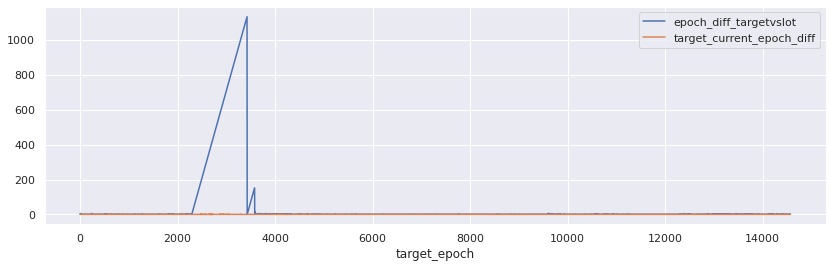

In [69]:
#plot the aggregate lag on epoch included vs target epoch together with the delta between source and target epocj
only_valuable_attestation_rows.groupby('target_epoch')[['epoch_diff_targetvslot','target_current_epoch_diff']].mean().plot(kind = 'line', figsize=(14,4))

In [72]:
# create a distribution of when the votes (valuable attestations) arrive from the perspective of the present, with knowledge of the future
only_valuable_attestation_rows['lag_0'] = only_valuable_attestation_rows['target_current_epoch_diff']==0
only_valuable_attestation_rows['lag_1'] = only_valuable_attestation_rows['target_current_epoch_diff']==1
only_valuable_attestation_rows['lag_2'] = only_valuable_attestation_rows['target_current_epoch_diff']==2
only_valuable_attestation_rows['lag_3+'] = only_valuable_attestation_rows['target_current_epoch_diff']>2

only_valuable_attestation_rows.head()

,input_slot,epoch,target_slot,block_slot,block_index,unique_commitee,target_epoch,validators4,attesting_validators,inclusion_lag,epoch_diff_targetvslot,block_slot_&_index,valuable_attestation,target_current_epoch_diff,lag_0,lag_1,lag_2,lag_3+
0,1,0.0,0,1,0,0.1,0,2763,67,1,0,1.00000,1.00000,-0.0,True,False,False,False
11783553,336098,10503.0,336097,336098,34,336097.0,10503,56726,93,1,1,336098.34375,336098.34375,-0.0,True,False,False,False
11783553,336098,10503.0,336097,336098,34,336097.0,10503,50637,93,1,1,336098.34375,336098.34375,-0.0,True,False,False,False
11783553,336098,10503.0,336097,336098,34,336097.0,10503,38215,93,1,1,336098.34375,336098.34375,-0.0,True,False,False,False
11783553,336098,10503.0,336097,336098,34,336097.0,10503,38279,93,1,1,336098.34375,336098.34375,-0.0,True,False,False,False


Text(0, 0.5, 'Cumulative Lag')

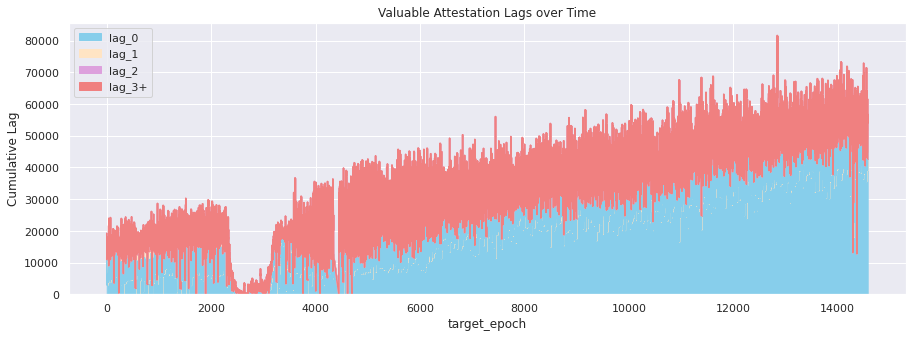

In [83]:
#plot it out!
ax = only_valuable_attestation_rows.groupby('target_epoch')[['lag_0','lag_1','lag_2','lag_3+']].sum().plot(kind='area',figsize=[15,5], color=['skyblue' ,'bisque', 'plum', 'lightcoral'])
ax.set_title('Valuable Attestation Lags over Time')
ax.set_ylabel('Cumulative Lag')



## Join with finality threshold

In [76]:
#load active validators over time

active_validators_over_time = pd.read_csv('./atts-data/atts-data-2.0/active_validators_over_time.csv')
active_validators_over_time.tail()

,Unnamed: 0,0,validators_entered_cumul,validators_exited_cumul,validators_active,validator_req_ffg,validator_req_ffg_per_slot
15036,15036,15036,78830.0,6292.0,72538.0,48359.0,1511.21875
15037,15037,15037,78834.0,6292.0,72542.0,48361.0,1511.28125
15038,15038,15038,78838.0,6292.0,72546.0,48364.0,1511.37500
15039,15039,15039,78842.0,6292.0,72550.0,48367.0,1511.46875
15040,15040,15040,78846.0,6292.0,72554.0,48369.0,1511.53125


In [81]:
grouped_finality = only_valuable_attestation_rows.groupby('target_epoch')[['lag_0','lag_1','lag_2','lag_3+']].sum()
grouped_finality.head()

,lag_0,lag_1,lag_2,lag_3+
target_epoch,,,,
0,11483.0,7747.0,0.0,0.0
1,4012.0,6956.0,0.0,0.0
2,4562.0,8137.0,0.0,0.0
3,3694.0,9040.0,0.0,0.0
4,3812.0,9782.0,0.0,0.0


In [82]:
merged_grouped_finality = grouped_finality.merge(active_validators_over_time, left_on='target_epoch', right_on='0', how='left')
merged_grouped_finality.head()

,lag_0,lag_1,lag_2,lag_3+,Unnamed: 0,0,validators_entered_cumul,validators_exited_cumul,validators_active,validator_req_ffg,validator_req_ffg_per_slot
0,11483.0,7747.0,0.0,0.0,0,0,20084.0,0.0,20084.0,13389.0,418.40625
1,4012.0,6956.0,0.0,0.0,1,1,20084.0,0.0,20084.0,13389.0,418.40625
2,4562.0,8137.0,0.0,0.0,2,2,20084.0,0.0,20084.0,13389.0,418.40625
3,3694.0,9040.0,0.0,0.0,3,3,20084.0,0.0,20084.0,13389.0,418.40625
4,3812.0,9782.0,0.0,0.0,4,4,20084.0,0.0,20084.0,13389.0,418.40625


In [84]:
merged_grouped_finality.to_csv('merged_group_finality.csv')